In [19]:
#Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [20]:
#Import files using pandas
data = pd.read_csv(r"D:\Visual Studio Code\ML\DataSet\spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [23]:
new_df = data[['v1', 'v2']]

# Now 'new_df' contains only the specified columns
print(new_df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Data Visulization

<Axes: xlabel='count', ylabel='v1'>

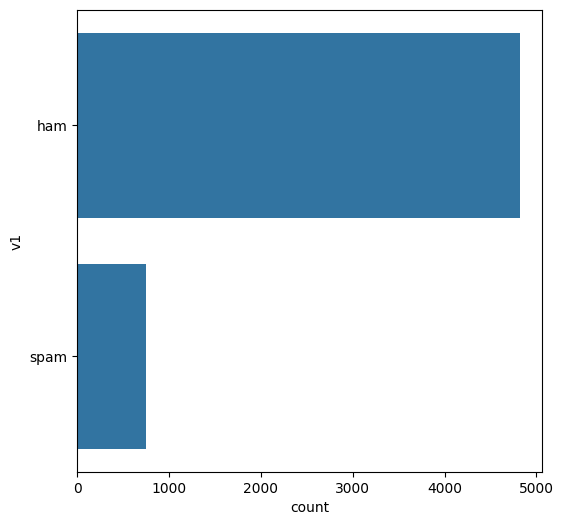

In [24]:
#Its show categories of sms
plt.figure(figsize=(6,6))
sns.countplot(new_df['v1'])

In [25]:
new_df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

# Label Encoding 

In [26]:
new_df.replace({'v1':{'ham':1,'spam':0}},inplace=True)

C:\Users\DragonBlade\AppData\Local\Temp\ipykernel_7980\2381921628.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df.replace({'v1':{'ham':1,'spam':0}},inplace=True)
C:\Users\DragonBlade\AppData\Local\Temp\ipykernel_7980\2381921628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace({'v1':{'ham':1,'spam':0}},inplace=True)


In [27]:
new_df.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
#Seperating the message and category of data

x = new_df['v2']
y = new_df['v1']


In [29]:
#Spliting the data into training and testing 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
#Transforming the text data to feature vectors that can be used as input to the Logistic Regression

feature_ext = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

x_train = feature_ext.fit_transform(x_train)
x_test = feature_ext.transform(x_test)

#Converting the data into array
x_train = x_train.toarray()
x_test = x_test.toarray()

#Convert the y_train and y_test as integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [31]:
print(x_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.26549366 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
#Checking the model Revaluation with training data
training_pred = model.predict(x_train)
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy of Trainig data : ",accuracy)


Accuracy of Trainig data :  0.9692618353152345


In [34]:
#Checking the model Revaluation with test data
test_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,test_pred)
print("Accuracy of Trainig data : ",accuracy)

Accuracy of Trainig data :  0.9524663677130045


# Naive Bayes

In [35]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [36]:
#Checking the model Revaluation with training data
training_pred = model.predict(x_train)
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy of Trainig data : ",accuracy)

Accuracy of Trainig data :  0.941440430783038


In [37]:
#Checking the model Revaluation with test data
test_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,test_pred)
print("Accuracy of Trainig data : ",accuracy)

Accuracy of Trainig data :  0.884304932735426


# Support Vector Machine Classifier

In [38]:
model = SVC(kernel='sigmoid',gamma=0.5,C=1)
model.fit(x_train, y_train)

SVC(C=1, gamma=0.5, kernel='sigmoid')

In [39]:
#Checking the model Revaluation with training data
training_pred = model.predict(x_train)
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy of Trainig data : ",accuracy)

Accuracy of Trainig data :  0.988332959389724


In [40]:
#Checking the model Revaluation with test data
test_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,test_pred)
print("Accuracy of Trainig data : ",accuracy)

Accuracy of Trainig data :  0.9766816143497757


# Prediction Model

In [63]:
data_input = [input("Enter Text Message : ")]
input_data_feature = feature_ext.transform(data_input)

pred = model.predict(input_data_feature)

if pred[0] == 0:
    print("The Message is Spam")
else:
    print("The Message is not Spam ")

The Message is not Spam 
